In [81]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# SMOTE stands for “Synthetic Minority Oversampling Technique” and is 
# one of the most commonly utilized resampling techniques. At a high level, 
# to oversample, pick a sample from the minority class (call it S), and 
# then pick one of its neighbors, N. Then pick a random point on the line segment 
# between S and N. This random new point is the synthetic sample you 
# have created using SMOTE. Repeating this over and over you can create more 
# and more new samples to even out your class imbalance.

In [82]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [83]:
# os.getcwd()

In [84]:
# os.listdir(os.getcwd())

In [85]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_reduced.csv")
all_param_df.shape


(31576, 357)

In [86]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [87]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31571    0
31572    0
31573    0
31574    0
31575    0
Name: suc_class, Length: 31576, dtype: int64

In [88]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [89]:
x_data.shape

(31576, 346)

In [90]:
#label encode the developer name

In [91]:
x_data['developer']=x_data['developer'].astype('category')

In [92]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

metascore  developer publisher  maxprice  maxdiscount  tagstrategy  \
0         88      18189     Valve       999           90          602   
1          0      18189     Valve       499           90            0   
2         79      18189     Valve       499           90           14   
3          0      18189     Valve       499           90            0   
4          0       6672     Valve       499           90            0   

   tagaction  tagadventure  tagdesignillustration  tagutilities  ...  \
0       5337             0                      0             0  ...   
1        738             0                      0             0  ...   
2        156             0                      0             0  ...   
3        626             0                      0             0  ...   
4        312           109                      0             0  ...   

   tagphilisophical  taggaming  tagfaith  tagmysterydungeon  tagfeaturefilm  \
0                 0          0         0                  0               0   
1                 0          0         0                  0               0   
2                 0          0         0                  0               0   
3                 0          0         0                  0               0   
4                 0          0         0                  0               0   

   tagsteammachine  tagclicker  taghardware  tag360video  tagvronly  
0                0           0            0            0          0  
1                0           0            0            0          0  
2                0           0            0            0          0  
3                0           0            0            0          0  
4                0           0            0            0          0  

[5 rows x 346 columns]

In [93]:
#label encode the publisher name

In [94]:
x_data['publisher']=x_data['publisher'].astype('category')

In [95]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

metascore  developer  publisher  maxprice  maxdiscount  tagstrategy  \
0         88      18189      15309       999           90          602   
1          0      18189      15309       499           90            0   
2         79      18189      15309       499           90           14   
3          0      18189      15309       499           90            0   
4          0       6672      15309       499           90            0   

   tagaction  tagadventure  tagdesignillustration  tagutilities  ...  \
0       5337             0                      0             0  ...   
1        738             0                      0             0  ...   
2        156             0                      0             0  ...   
3        626             0                      0             0  ...   
4        312           109                      0             0  ...   

   tagphilisophical  taggaming  tagfaith  tagmysterydungeon  tagfeaturefilm  \
0                 0          0         0                  0               0   
1                 0          0         0                  0               0   
2                 0          0         0                  0               0   
3                 0          0         0                  0               0   
4                 0          0         0                  0               0   

   tagsteammachine  tagclicker  taghardware  tag360video  tagvronly  
0                0           0            0            0          0  
1                0           0            0            0          0  
2                0           0            0            0          0  
3                0           0            0            0          0  
4                0           0            0            0          0  

[5 rows x 346 columns]

In [96]:
# over sample the minor class via SMOTE so that the 2
# data sets are balanced

from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_sample(x_data, y_class)

In [97]:
# see classes are balanced
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:, 0].value_counts()

1    30773
0    30773
Name: suc_class, dtype: int64

In [98]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=5)

In [99]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [100]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [101]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [102]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [103]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [104]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X, y)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.824649580796811
Testing Data Score: 0.824202248651459


In [105]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7659
           1       0.89      0.75      0.81      7728

    accuracy                           0.82     15387
   macro avg       0.83      0.82      0.82     15387
weighted avg       0.83      0.82      0.82     15387



In [106]:
# thinking about baseline results:
# Support is balanced - ~9700 of 1's and 0's
# Percision: for no success: 79%, better for successful games: 94%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 95% for 0, 74% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 85% 

<AxesSubplot:>

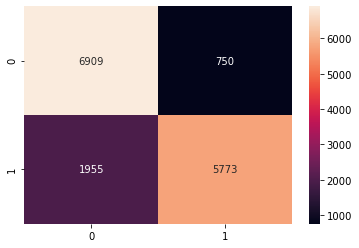

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [108]:
# Co-efficient importance

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list


(346,) (1, 346)
(346,)


0          1
141                    tagsingleplayer  17.173897
11                              tagrpg  14.812242
62                        tagopenworld  11.284363
7                         tagadventure  10.490775
14                      tagearlyaccess  10.391056
12             tagmassivelymultiplayer  10.198222
16                       tagsimulation   9.915571
3                             maxprice   8.792010
87                           tagmmorpg   8.657276
5                          tagstrategy   8.146424
342                         tagclicker   7.966817
6                            tagaction   7.714521
156                            taggore   6.675952
177          tagcharactercustomization   6.627404
15                           tagcasual   6.293330
170                         tagviolent   6.219210
283                           tagmemes   6.014502
219                          tagremake   5.745312
108                     tagmultiplayer   5.656224
89                  taggreatsoundtrack   5.593179
13                            tagindie   5.480037
57                             tagcoop   5.177114
83                         tagfighting   5.094791
65                         tagcrafting   5.078398
91                        tagboardgame   4.819028
296                           tagtanks   4.769307
53                           tagsoccer   4.758861
88                            tagspace   4.740813
321                              tagvr   4.733169
154                     tagcitybuilder   4.646675
56                          tagfantasy   4.622518
63                      tagthirdperson   4.513194
324                        tagwordgame   4.137312
139                        tagmedieval   4.039511
257                    tagbasebuilding   4.000133
43                         tagcardgame   3.949336
293                    tagwarhammer40k   3.931506
84                       tagbasketball   3.915216
277                 tagtradingcardgame   3.831185
55                          tagpirates   3.783699
148                        tagepisodic   3.705607
105                       taglocalcoop   3.558673
247                     tagmartialarts   3.492125
101              tagthirdpersonshooter   3.478248
262                      tagcontroller   3.473380
50                              tagrts   3.442265
237                   tagchoicesmatter   3.406982
10                       tagfreetoplay   3.396272
290              tagvillainprotagonist   3.394684
99                          tagsandbox   3.259471
114                       tagroguelite   3.241440
111                           tagscifi   3.226860
39                         tagsurvival   3.217347
51                        tagturnbased   3.152179
32                     tagtowerdefense   3.029947
182                           tagmechs   2.948525
305                         tagfishing   2.844623
106                      tagonlinecoop   2.753256
130                           tagfunny   2.701958
30                         tagbuilding   2.673989
41                           tagpuzzle   2.645301
294                      tagmanagement   2.564565
104                     tagfirstperson   2.524367
60                          tagclassic   2.463760
17                           tagracing   2.439344
202                   taggamesworkshop   2.431542
297                         tagsailing   2.395168
8                tagdesignillustration   2.365668
18                           tagsports   2.356180
168                       tagswordplay   2.337903
48                           tagaliens   2.329048
94                              tagpvp   2.287717
126                           taganime   2.222957
275              tagresourcemanagement   2.214982
140                       tagrealistic   2.197966
172                          tageco0my   2.132589
64                       tagpointclick   2.131234
302                          tagflight   2.117222
160                            tagjrpg   2.092496
205                     tagdestructio

In [110]:
# predictions = clf_1.predict(x_test_scaled)
for input, prediction, label in zip(X_test_scaled, y_pred, y_test):
  if prediction != label:
    print(input, 'has been classified as ', prediction, 'and should be ', label) 

[0.         0.18054018 0.21855776 0.020005   0.10588235 0.
 0.00354104 0.00986501 0.         0.         0.         0.
 0.00082461 0.00195597 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00172685 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00067287 0.
 0.         0.         0.         0.00355413 0.         0.
 0.02030981 0.         0.00309875 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01080325 0.         0.         0.         0.         0.00218494
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01759916
 0.         0.         0.         0.00193994 0.00040063 0.
 0.         0.         0.         0.    

 0.         0.         0.         0.        ] has been classified as  0 and should be  [1]
[0.         0.57705455 0.57621326 0.020005   0.23529412 0.00550928
 0.         0.         0.         0.         0.         0.
 0.         0.00334836 0.         0.         0.01274441 0.
 0.         0.         0.         0.         0.         0.11153119
 0.         0.         0.         0.         0.         0.
 0.01823003 0.         0.         0.         0.         0.
 0.         0.03231419 0.         0.         0.         0.02666043
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00891317 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.


 0.00000000e+00 0.00000000e+00] has been classified as  0 and should be  [1]
[0.00000000e+00 5.70266237e-01 5.59808612e-01 3.45172586e-04
 1.37254902e-01 1.01659343e-03 1.80392856e-03 5.08826584e-03
 0.00000000e+00 0.00000000e+00 2.32198142e-03 5.06512301e-03
 7.00915313e-03 0.00000000e+00 0.00000000e+00 8.29145729e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.07159995e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.79676070e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.27098052e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10231254e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

 0.         0.         0.         0.        ] has been classified as  1 and should be  [0]
[1.97916667e-01 1.19782389e-01 1.22237412e-01 0.00000000e+00
 0.00000000e+00 1.54128681e-03 2.69475747e-03 8.72274143e-03
 0.00000000e+00 0.00000000e+00 3.67235360e-03 4.94452484e-03
 8.74082626e-03 2.75162445e-03 1.25111707e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.34878141e-03
 3.61705851e-04 0.00000000e+00 0.00000000e+00 2.28706625e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.00320256e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22634898e-03 4.52977456e-04 0.00000000e+00 0.0000000

 0.         0.         0.         0.        ] has been classified as  0 and should be  [1]
[8.33333333e-01 3.59058302e-01 3.60845295e-01 4.99749875e-03
 3.13725490e-01 4.59106710e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.94510012e-03 0.00000000e+00 2.81407035e-02
 1.13477654e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.13421550e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.64056674e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.41877144e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0000000

 0.00000000e+00 0.00000000e+00] has been classified as  1 and should be  [0]
[0.00000000e+00 8.44735448e-01 8.41877421e-01 2.49624812e-03
 2.82352941e-01 0.00000000e+00 2.00436506e-04 3.43717549e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.98368917e-04 1.04259756e-03 2.26130653e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.72117

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 has been classified as  0 and should be  [1]
[0.00000000e+00 7.51239709e-01 5.52118934e-01 8.33416708e-03
 1.49019608e-01 1.96760018e-04 5.47859784e-03 3.84215992e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.48150113e-03 4.46827525e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.04490501e-03 2.49339982e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.88601036e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.85423966e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.000000

[0.77083333 0.78118531 0.77910686 0.01       0.2745098  0.
 0.         0.02336449 0.         0.         0.         0.
 0.         0.0063652  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03445588
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02680448 0.         0.         0.
 0.         0.         0.         0.         0.01795899 0.
 0.         0.         0.         0.         0.         0.
 0.02732588 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03067773 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.08205374
 0.         0.         0.02534765 0.    

 0.00000000e+00 0.00000000e+00] has been classified as  0 and should be  [1]
[0.00000000e+00 4.15771990e-01 4.17236272e-01 4.33216608e-03
 3.80392157e-01 2.91860694e-03 1.55895060e-04 7.26895119e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.51412280e-03 0.00000000e+00 2.86432161e-02
 6.98324022e-04 1.77383592e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.96888393e-04 0.00000000e+00 0.00000000e+00
 0.00000

 0.00000000e+00 0.00000000e+00] has been classified as  0 and should be  [1]
[0.00000000e+00 5.64200087e-01 5.63112326e-01 2.49624812e-03
 3.72549020e-01 0.00000000e+00 0.00000000e+00 2.59605400e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.59189580e-02
 0.00000000e+00 1.08075852e-02 0.00000000e+00 0.00000000e+00
 1.92039106e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

 0.00000000e+00 0.00000000e+00] has been classified as  1 and should be  [0]
[0.00000000e+00 6.78397766e-01 6.22351333e-01 1.82441221e-02
 3.13725490e-02 4.75503378e-03 1.84847000e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.27834057e-02
 0.00000000e+00 1.32608407e-03 3.27673518e-03 0.00000000e+00
 4.62639665e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.65615142e-02
 2.56680100e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.28262610e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

 0.00000000e+00 0.00000000e+00] has been classified as  1 and should be  [0]
[0.         0.21693708 0.21519708 0.00222611 0.2745098  0.
 0.         0.         0.12439024 0.         0.         0.00180897
 0.         0.00033152 0.         0.03567839 0.00986383 0.
 0.         0.         0.         0.         0.         0.13799622
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01714998
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00194805 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [111]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test_scaled)
prob_y_2

array([[0.82956236, 0.17043764],
       [0.36669326, 0.63330674],
       [0.77892481, 0.22107519],
       ...,
       [0.73436628, 0.26563372],
       [0.7717003 , 0.2282997 ],
       [0.71834935, 0.28165065]])

In [112]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [113]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )


0.9209305342339369
